# Final Project Alejandro Oliveros Ordás


## Setup <a class="anchor" id="setup"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Oct 29 16:36:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = "/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2"
print(HOME)

/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2


## Install YOLOv5 <a class="anchor" id="install-yolov5"></a>

In [ ]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


###1. Use pre-trained COCO model


In [ ]:
%cd {HOME}/yolov5
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source {HOME}/players_segment.mp4 --name coco

/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/yolov5
detect: weights=['yolov5x.pt'], source=/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/players_segment.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
video 1/1 (1/101) /content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/players_segment.mp4: 384x640 10 persons, 2 sports balls, 58.7ms
video 1/1 (2/101) /content/drive/MyDrive

###2. Use custom model

This model was traind using [football-players-detection](https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/overview) dataset.

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I" -O best.pt && rm -rf /tmp/cookies.txt

/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2
--2023-10-29 16:39:12--  https://docs.google.com/uc?export=download&confirm=t&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I
Resolving docs.google.com (docs.google.com)... 209.85.234.100, 209.85.234.139, 209.85.234.138, ...
Connecting to docs.google.com (docs.google.com)|209.85.234.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/levestsqn3h1mpi1pbppn6lmms31nlmd/1698597525000/04309230031174164349/*/1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I?e=download&uuid=4ec67c2a-b127-4165-b309-53a94bf12577 [following]
--2023-10-29 16:39:12--  https://doc-0g-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/levestsqn3h1mpi1pbppn6lmms31nlmd/1698597525000/04309230031174164349/*/1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I?e=download&uuid=4ec67c2a-b127-4165-b309-53a94bf12577
Resolving doc-0g-ag-docs.googleus

In [ ]:
WEIGHTS_PATH = f"{HOME}/best.pt"

In [ ]:
%cd {HOME}/yolov5
!python detect.py --weights {HOME}/best.pt --img 1280 --conf 0.25 --source {HOME}/players_segment.mp4 --name custom

/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/yolov5
detect: weights=['/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/best.pt'], source=/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/players_segment.mp4, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 416 layers, 139999708 parameters, 0 gradients, 207.9 GFLOPs
video 1/1 (1/101) /content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/players_segment.mp4: 768x1280 1 

### 2.1 Use custom model - single frame

In [ ]:
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import cv2

%matplotlib inline


def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.imshow(image[...,::-1])
    plt.show()

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/players_segment.mp4"

In [ ]:
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

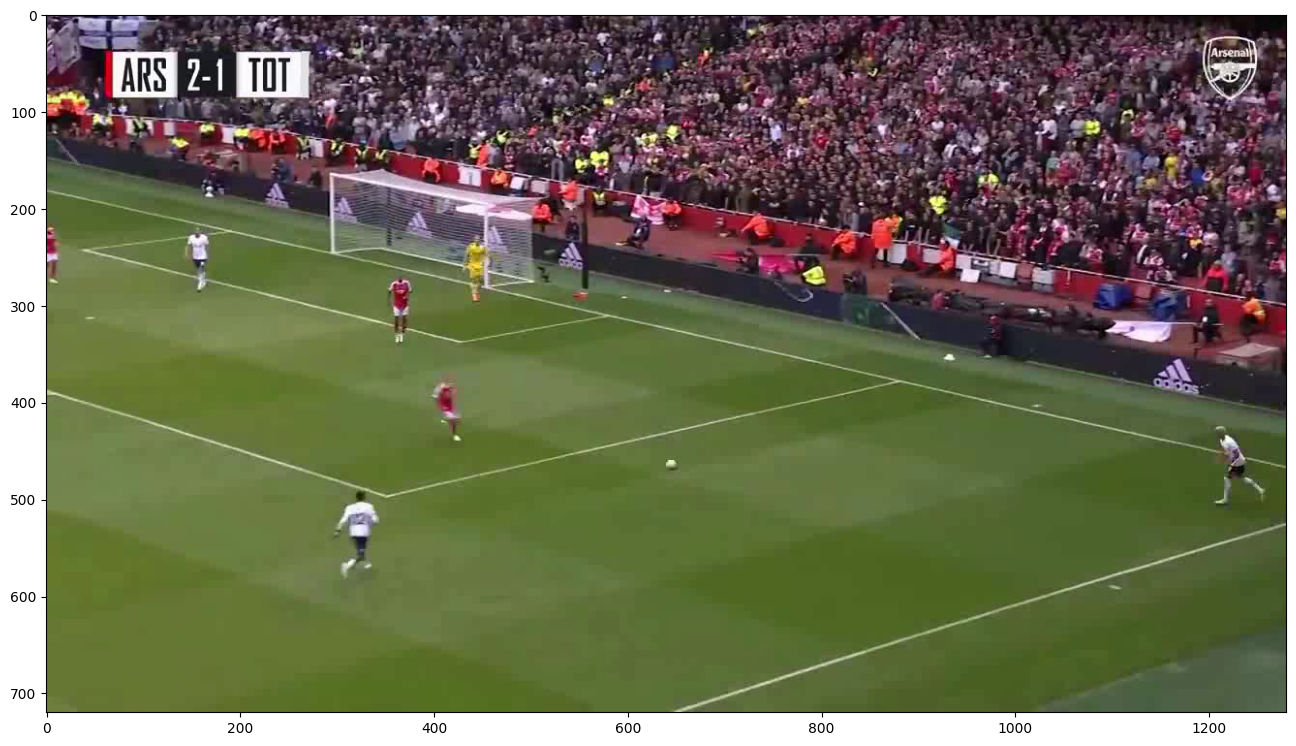

In [ ]:
frame = next(frame_iterator)
plot_image(frame, 16)

In [ ]:
!pip install -r requirements.txt

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', WEIGHTS_PATH, device=0)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 416 layers, 139999708 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 


In [ ]:
results = model(frame, size=1280)

In [ ]:
results.pandas()

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x1280 1 ball, 7 players, 1 referee
Speed: 9.9ms pre-process, 191.4ms inference, 2.4ms NMS per image at shape (1, 3, 768, 1280)

In [ ]:
results.pred[0]

tensor([[1.20351e+03, 4.24342e+02, 1.26032e+03, 5.09688e+02, 9.74412e-01, 2.00000e+00],
        [2.98341e+02, 4.90624e+02, 3.44735e+02, 5.78554e+02, 9.65189e-01, 2.00000e+00],
        [1.44706e+02, 2.20433e+02, 1.69860e+02, 2.86356e+02, 9.59243e-01, 2.00000e+00],
        [3.97874e+02, 3.76667e+02, 4.29943e+02, 4.40388e+02, 9.54796e-01, 2.00000e+00],
        [3.52714e+02, 2.70000e+02, 3.78229e+02, 3.39655e+02, 9.52754e-01, 2.00000e+00],
        [6.39650e+02, 4.58509e+02, 6.51646e+02, 4.70803e+02, 8.55093e-01, 0.00000e+00],
        [0.00000e+00, 2.17257e+02, 1.46238e+01, 2.79510e+02, 8.27422e-01, 2.00000e+00],
        [4.31778e+02, 2.28764e+02, 4.53183e+02, 2.96168e+02, 7.75144e-01, 3.00000e+00],
        [4.32162e+02, 2.28625e+02, 4.53062e+02, 2.96849e+02, 5.13522e-01, 2.00000e+00]], device='cuda:0')

In [ ]:
model.names

{0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}

## Install ByteTrack and other libs<a class="anchor" id="install-bytetrack"></a>

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -r requirements.txt
!cd ByteTrack && python3 setup.py develop
!pip install cython_bbox

/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2
fatal: destination path 'ByteTrack' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 114.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement onnxruntime==1.8.0 (from versions: 

In [ ]:
import sys
sys.path.append(f"{HOME}/ByteTrack")

In [ ]:
!pip install onemetric --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
!pip install loguru
!pip install lap



  Using cached loguru-0.7.2-py3-none-any.whl (62 kB)
  Using cached lap-0.4.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for lap: filename=lap-0.4.0-cp310-cp310-linux_x86_64.whl size=1628963 sha256=07a99c7951ccc3d5b4c97fc24395257a323893c97ae2879a33d5cd77d2d99fdb
  Stored in directory: /root/.cache/pip/wheels/00/42/2e/9dfe19270eea279d79e84767ff0d7b8082c3bf776cad00e83d
Successfully built lap


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch

## Custom annotator <a class="anchor" id="custom-annotator"></a>

In [ ]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any

import cv2

import numpy as np


# geometry utilities


@dataclass(frozen=True)
class Point:
    x: float
    y: float

    @property
    def int_xy_tuple(self) -> Tuple[int, int]:
        return int(self.x), int(self.y)


@dataclass(frozen=True)
class Rect:
    x: float
    y: float
    width: float
    height: float

    @property
    def min_x(self) -> float:
        return self.x

    @property
    def min_y(self) -> float:
        return self.y

    @property
    def max_x(self) -> float:
        return self.x + self.width

    @property
    def max_y(self) -> float:
        return self.y + self.height

    @property
    def top_left(self) -> Point:
        return Point(x=self.x, y=self.y)

    @property
    def bottom_right(self) -> Point:
        return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
        return Rect(
            x=self.x - padding,
            y=self.y - padding,
            width=self.width + 2*padding,
            height=self.height + 2*padding
        )

    def contains_point(self, point: Point) -> bool:
        return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y


# detection utilities


@dataclass
class Detection:
    rect: Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_results(cls, pred: np.ndarray, names: Dict[int, str]) -> List[Detection]:
        result = []
        for x_min, y_min, x_max, y_max, confidence, class_id in pred:
            class_id=int(class_id)
            result.append(Detection(
                rect=Rect(
                    x=float(x_min),
                    y=float(y_min),
                    width=float(x_max - x_min),
                    height=float(y_max - y_min)
                ),
                class_id=class_id,
                class_name=names[class_id],
                confidence=float(confidence)
            ))
        return result


def filter_detections_by_class(detections: List[Detection], class_name: str) -> List[Detection]:
    return [
        detection
        for detection
        in detections
        if detection.class_name == class_name
    ]


# draw utilities


@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int

    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

    @classmethod
    def from_hex_string(cls, hex_string: str) -> Color:
        r, g, b = tuple(int(hex_string[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
        return Color(r=r, g=g, b=b)


def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, thickness)
    return image


def draw_filled_rect(image: np.ndarray, rect: Rect, color: Color) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, -1)
    return image


def draw_polygon(image: np.ndarray, countour: np.ndarray, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, thickness)
    return image


def draw_filled_polygon(image: np.ndarray, countour: np.ndarray, color: Color) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, -1)
    return image


def draw_text(image: np.ndarray, anchor: Point, text: str, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.7, color.bgr_tuple, thickness, 2, False)
    return image


def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color.bgr_tuple,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image


# base annotator


@dataclass
class BaseAnnotator:
    colors: List[Color]
    thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_ellipse(
                image=image,
                rect=detection.rect,
                color=self.colors[detection.class_id],
                thickness=self.thickness
            )
        return annotated_image

In [ ]:
# white
BALL_COLOR_HEX = "#FFFFFF"
BALL_COLOR = Color.from_hex_string(BALL_COLOR_HEX)

# red
#GOALKEEPER_COLOR_HEX = "#850101"
GOALKEEPER_COLOR_HEX = "#00D4BB"
GOALKEEPER_COLOR = Color.from_hex_string(GOALKEEPER_COLOR_HEX)

# green
PLAYER_COLOR_HEX = "#00D4BB"
PLAYER_COLOR = Color.from_hex_string(PLAYER_COLOR_HEX)

# yellow
REFEREE_COLOR_HEX = "#FFFF00"
REFEREE_COLOR = Color.from_hex_string(REFEREE_COLOR_HEX)

COLORS = [
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS = 4

In [ ]:
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import cv2

%matplotlib inline


def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.imshow(image[...,::-1])
    plt.show()

In [ ]:
# get fresh video frame generator
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

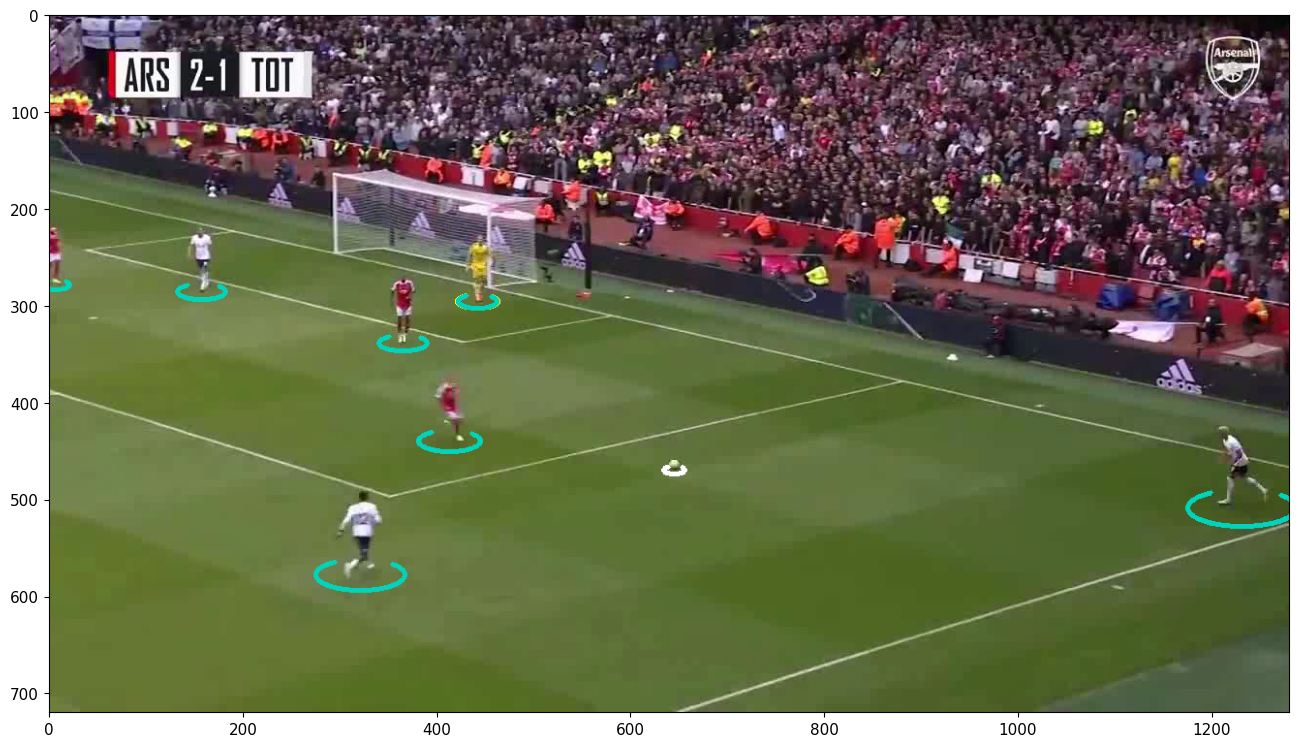

In [ ]:
# initiate annotators
annotator = BaseAnnotator(
    colors=COLORS,
    thickness=THICKNESS)

# acquire video frame
frame = next(frame_iterator)

# run detector
results = model(frame, size=1280)
detections = Detection.from_results(
    pred=results.pred[0].cpu().numpy(),
    names=model.names)

# annotate video frame
annotated_image = annotator.annotate(
    image=frame,
    detections=detections)

# plot video frame
plot_image(annotated_image, 16)

## Detect ball possession <a class="anchor" id="detect-ball-possession"></a>


We want to mark current ball location as well as player currently in possession with small triangle markers.

### Utils

In [ ]:
# black
MARKER_CONTOUR_COLOR_HEX = "000000"
MARKER_CONTOUR_COLOR = Color.from_hex_string(MARKER_CONTOUR_COLOR_HEX)

# red
PLAYER_MARKER_FILL_COLOR_HEX = "FF0000"
PLAYER_MARKER_FILL_COLOR = Color.from_hex_string(PLAYER_MARKER_FILL_COLOR_HEX)

# green
BALL_MERKER_FILL_COLOR_HEX = "00FF00"
BALL_MARKER_FILL_COLOR = Color.from_hex_string(BALL_MERKER_FILL_COLOR_HEX)

MARKER_CONTOUR_THICKNESS = 2
MARKER_WIDTH = 20
MARKER_HEIGHT = 20
MARKER_MARGIN = 10

# distance in pixels from the player's bounding box where we consider the ball is in his possession
PLAYER_IN_POSSESSION_PROXIMITY = 30

In [ ]:
from typing import List

import numpy as np


# calculates coordinates of possession marker
def calculate_marker(anchor: Point) -> np.ndarray:
    x, y = anchor.int_xy_tuple
    return(np.array([
        [x - MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN],
        [x, y - MARKER_MARGIN],
        [x + MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN]
    ]))


# draw single possession marker
def draw_marker(image: np.ndarray, anchor: Point, color: Color) -> np.ndarray:
    possession_marker_countour = calculate_marker(anchor=anchor)
    image = draw_filled_polygon(
        image=image,
        countour=possession_marker_countour,
        color=color)
    image = draw_polygon(
        image=image,
        countour=possession_marker_countour,
        color=MARKER_CONTOUR_COLOR,
        thickness=MARKER_CONTOUR_THICKNESS)
    return image


# dedicated annotator to draw possession markers on video frames
@dataclass
class MarkerAnntator:

    color: Color

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_marker(
                image=image,
                anchor=detection.rect.top_center,
                color=self.color)
        return annotated_image

In [ ]:
from typing import List, Optional


# resolves which player is currently in ball possession based on player-ball proximity
def get_player_in_possession(
    player_detections: List[Detection],
    ball_detections: List[Detection],
    proximity: int
) -> Optional[Detection]:
    if len(ball_detections) != 1:
        return None
    ball_detection = ball_detections[0]
    for player_detection in player_detections:
        if player_detection.rect.pad(proximity).contains_point(point=ball_detection.rect.center):
            return player_detection

### Single frame

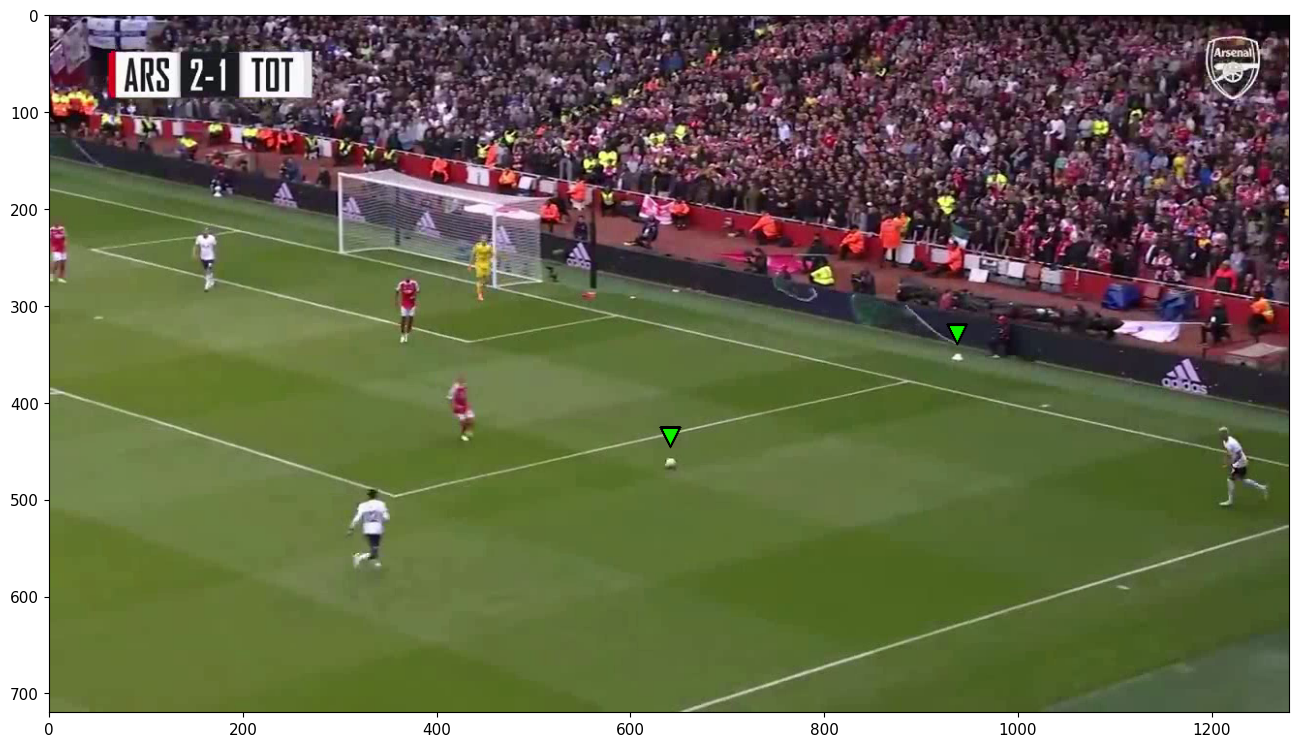

In [ ]:
# initiate annotators
ball_marker_annotator = MarkerAnntator(color=BALL_MARKER_FILL_COLOR)
player_marker_annotator = MarkerAnntator(color=PLAYER_MARKER_FILL_COLOR)

# acquire video frame
frame = next(frame_iterator)

# run detector
results = model(frame, size=1280)
detections = Detection.from_results(
    pred=results.pred[0].cpu().numpy(),
    names=model.names)

# postprocess results
ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
player_detections = filter_detections_by_class(detections=detections, class_name="player")
player_in_possession_detection = get_player_in_possession(
    player_detections=player_detections,
    ball_detections=ball_detections,
    proximity=PLAYER_IN_POSSESSION_PROXIMITY)

# annotate video frame
annotated_image = frame.copy()
annotated_image = ball_marker_annotator.annotate(
    image=annotated_image,
    detections=ball_detections)
annotated_image = player_marker_annotator.annotate(
    image=annotated_image,
    detections=[player_in_possession_detection] if player_in_possession_detection else [])

# plot video frame
plot_image(annotated_image, 16)

### Full video

In [ ]:
# settings
SOURCE_VIDEO_PATH = f"{HOME}/players_segment.mp4"
TARGET_VIDEO_PATH = f"{HOME}/ball-possession/players_segment.mp4"

In [ ]:
from dataclasses import dataclass

import cv2


"""
usage example:

video_config = VideoConfig(
    fps=30,
    width=1920,
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH,
    video_config=video_config)

for frame in frames:
    ...
    video_writer.write(frame)

video_writer.release()
"""


# stores information about output video file, width and height of the frame must be equal to input video
@dataclass(frozen=True)
class VideoConfig:
    fps: float
    width: int
    height: int


# create cv2.VideoWriter object that we can use to save output video
def get_video_writer(target_video_path: str, video_config: VideoConfig) -> cv2.VideoWriter:
    video_target_dir = os.path.dirname(os.path.abspath(target_video_path))
    os.makedirs(video_target_dir, exist_ok=True)
    return cv2.VideoWriter(
        target_video_path,
        fourcc=cv2.VideoWriter_fourcc(*"mp4v"),
        fps=video_config.fps,
        frameSize=(video_config.width, video_config.height),
        isColor=True
    )

In [ ]:
cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)

if not cap.isOpened():
    print("Error: Couldn't open the video file.")
else:
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print(f"FPS: {fps}")
    print(f"Width: {width}")
    print(f"Height: {height}")

    cap.release()


FPS: 25
Width: 1280
Height: 720


In [ ]:
from tqdm.notebook import tqdm


# initiate video writer
video_config = VideoConfig(
    fps=25,
    width=1280,
    height=720)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH,
    video_config=video_config)

# get fresh video frame generator
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

# initiate annotators
ball_marker_annotator = MarkerAnntator(color=BALL_MARKER_FILL_COLOR)
player_marker_annotator = MarkerAnntator(color=PLAYER_MARKER_FILL_COLOR)

# loop over frames
for frame in tqdm(frame_iterator, total=101):

    # run detector
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # postprocess results
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player") + goalkeeper_detections
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    # annotate video frame
    annotated_image = frame.copy()
    annotated_image = ball_marker_annotator.annotate(
        image=annotated_image,
        detections=ball_detections)
    annotated_image = player_marker_annotator.annotate(
        image=annotated_image,
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    # save video frame
    video_writer.write(annotated_image)

# close output video
video_writer.release()

  0%|          | 0/101 [00:00<?, ?it/s]

## Full video tracking <a class="anchor" id="full-video-tracking"></a>

In [ ]:
# settings
SOURCE_VIDEO_PATH = f"{HOME}/players_segment.mp4"
TARGET_VIDEO_PATH = f"{HOME}/ball-possession/players_segment_full_final.mp4"

In [ ]:
from typing import List

import numpy as np

"""
BYTETracker does not assign tracker_id to existing bounding boxes but rather
predicts the next bounding box position based on previous one. Therefore, we
need to find a way to match our bounding boxes with predictions.
"""

# converts List[Detection] into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: List[Detection], with_confidence: bool = True) -> np.ndarray:
    return np.array([
        [
            detection.rect.top_left.x,
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y,
            detection.confidence
        ] if with_confidence else [
            detection.rect.top_left.x,
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y
        ]
        for detection
        in detections
    ], dtype=float)


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: List[Detection],
    tracks: List[STrack]
) -> List[Detection]:
    detection_boxes = detections2boxes(detections=detections, with_confidence=False)
    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detection_boxes)
    track2detection = np.argmax(iou, axis=1)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            detections[detection_index].tracker_id = tracks[tracker_index].track_id
    return detections

In [ ]:
# text annotator to display tracker_id
@dataclass
class TextAnnotator:
    background_color: Color
    text_color: Color
    text_thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            # if tracker_id is not assigned skip annotation
            if detection.tracker_id is None:
                continue

            # calculate text dimensions
            size, _ = cv2.getTextSize(
                str(detection.tracker_id),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                thickness=self.text_thickness)
            width, height = size

            # calculate text background position
            center_x, center_y = detection.rect.bottom_center.int_xy_tuple
            x = center_x - width // 2
            y = center_y - height // 2 + 10

            # draw background
            annotated_image = draw_filled_rect(
                image=annotated_image,
                rect=Rect(x=x, y=y, width=width, height=height).pad(padding=5),
                color=self.background_color)

            # draw text
            annotated_image = draw_text(
                image=annotated_image,
                anchor=Point(x=x, y=y + height),
                text=str(detection.tracker_id),
                color=self.text_color,
                thickness=self.text_thickness)
        return annotated_image

In [ ]:
from tqdm.notebook import tqdm

# initiate video writer
video_config = VideoConfig(
    fps=25,
    width=1280,
    height=720)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH,
    video_config=video_config)

# get fresh video frame generator
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

# initiate annotators
base_annotator = BaseAnnotator(
    colors=[
        BALL_COLOR,
        PLAYER_COLOR,
        PLAYER_COLOR,
        REFEREE_COLOR
    ],
    thickness=THICKNESS)

player_goalkeeper_text_annotator = TextAnnotator(
    PLAYER_COLOR, text_color=Color(255, 255, 255), text_thickness=2)
referee_text_annotator = TextAnnotator(
    REFEREE_COLOR, text_color=Color(0, 0, 0), text_thickness=2)

ball_marker_annotator = MarkerAnntator(
    color=BALL_MARKER_FILL_COLOR)
player_in_possession_marker_annotator = MarkerAnntator(
    color=PLAYER_MARKER_FILL_COLOR)


# initiate tracker
byte_tracker = BYTETracker(BYTETrackerArgs())

# loop over frames
for frame in tqdm(frame_iterator, total=101):

    # run detector
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # filter detections by class
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    referee_detections = filter_detections_by_class(detections=detections, class_name="referee")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player")

    player_goalkeeper_detections = player_detections + goalkeeper_detections
    tracked_detections = player_detections + goalkeeper_detections + referee_detections

    # calculate player in possession
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_goalkeeper_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    # track
    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=tracked_detections),
        img_info=frame.shape,
        img_size=frame.shape
    )
    tracked_detections = match_detections_with_tracks(detections=tracked_detections, tracks=tracks)

    tracked_referee_detections = filter_detections_by_class(detections=tracked_detections, class_name="referee")
    tracked_goalkeeper_detections = filter_detections_by_class(detections=tracked_detections, class_name="goalkeeper")
    tracked_player_detections = filter_detections_by_class(detections=tracked_detections, class_name="player")

    # annotate video frame
    annotated_image = frame.copy()
    annotated_image = base_annotator.annotate(
        image=annotated_image,
        detections=tracked_detections)

    annotated_image = player_goalkeeper_text_annotator.annotate(
        image=annotated_image,
        detections=tracked_goalkeeper_detections + tracked_player_detections)
    annotated_image = referee_text_annotator.annotate(
        image=annotated_image,
        detections=tracked_referee_detections)

    annotated_image = ball_marker_annotator.annotate(
        image=annotated_image,
        detections=ball_detections)
    annotated_image = player_marker_annotator.annotate(
        image=annotated_image,
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    # save video frame
    video_writer.write(annotated_image)

# close output video
video_writer.release()

  0%|          | 0/101 [00:00<?, ?it/s]

## Divide by color <a class="anchor" id="put-everything-together"></a>

In [ ]:
# settings
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Project1.mp4"
TARGET_VIDEO_PATH = f"{HOME}/ball-possession/players_segment_full_final_color.mp4"

In [ ]:
cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)

if not cap.isOpened():
    print("Error: Couldn't open the video file.")
else:
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Get the total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"FPS: {fps}")
    print(f"Width: {width}")
    print(f"Height: {height}")
    print(f"Total Frames: {total_frames}")  # Displaying the total number of frames

    cap.release()






FPS: 25
Width: 1280
Height: 720
Total Frames: 2905


In [81]:
def check_pixel_color(pixel, team_color_criteria): #BGR
    blue, green, red = pixel
    b_min, b_max, g_min, g_max,r_min, r_max  = team_color_criteria

    return  b_min <= blue <= b_max and g_min <= green <= g_max and r_min <= red <= r_max

def classify_team_by_color(image, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    roi = image[y1:y2, x1:x2]

    arsenal_criteria = ( 0, 60, 0, 40,140, 255)  # (R min, R max, G min, G max, B min, B max)
    tottenham_criteria = (0, 30, 0, 30, 0, 30)

    arsenal_count = 0
    tottenham_count = 0

    for row in roi:
        for pixel in row:
            if check_pixel_color(pixel, arsenal_criteria):
                arsenal_count += 1
            if check_pixel_color(pixel, tottenham_criteria):
                tottenham_count += 1

    #print(f"For BBox {bbox}, Arsenal pixels: {arsenal_count}, Tottenham pixels: {tottenham_count}")  # Debugging info

    if arsenal_count > 10:
        return "ARSENAL"
    elif tottenham_count > 5:
        return "TOTTENHAM"
    else:
        return ""

def classify_goalkeeper_by_color(image, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    roi = image[y1:y2, x1:x2]

    # Define criteria for goalkeepers' jerseys
    tottenham_gk_criteria = (0, 60, 0, 60, 190, 255)  # BGR format for orange
    arsenal_gk_criteria = (0, 60, 190, 255, 0, 60)    # BGR format for yellow


    tottenham_gk_count = 0
    arsenal_gk_count = 0

    for row in roi:
        for pixel in row:
            if check_pixel_color(pixel, tottenham_gk_criteria):
                tottenham_gk_count += 1
            elif check_pixel_color(pixel, arsenal_gk_criteria):
                arsenal_gk_count += 1

    #print(f"For BBox {bbox}, Arsenal GK pixels: {arsenal_gk_count}, Tottenham GK pixels: {tottenham_gk_count}")  # Debugging info

    if tottenham_gk_count > arsenal_gk_count:
        return "TOTTENHAM GK"
    elif arsenal_gk_count > tottenham_gk_count:
        return "ARSENAL GK"
    else:
        return ""



In [82]:
class TextAnnotator:
    def __init__(self, background_color, text_color, text_thickness):
        self.background_color = background_color
        self.text_color = text_color
        self.text_thickness = text_thickness

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            # We will check the label instead of tracker_id for the annotation
            if not hasattr(detection, 'label') or detection.label is None:
              continue

            # calculate text dimensions
            size, _ = cv2.getTextSize(
                str(detection.label),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                thickness=self.text_thickness)
            width, height = size

            # calculate text background position
            center_x, center_y = detection.rect.bottom_center.int_xy_tuple
            x = center_x - width // 2
            y = center_y - height // 2 + 10

            # draw background
            annotated_image = draw_filled_rect(
                image=annotated_image,
                rect=Rect(x=x, y=y, width=width, height=height).pad(padding=5),
                color=self.background_color)

            # draw text
            annotated_image = draw_text(
                image=annotated_image,
                anchor=Point(x=x, y=y + height),
                text=str(detection.label),
                color=self.text_color,
                thickness=self.text_thickness)
        return annotated_image


In [ ]:
from tqdm.notebook import tqdm

# initiate video writer
video_config = VideoConfig(
    fps=25,
    width=1280,
    height=720)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH,
    video_config=video_config)

# get fresh video frame generator
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

# initiate annotators
base_annotator = BaseAnnotator(
    colors=[
        BALL_COLOR,
        PLAYER_COLOR,
        PLAYER_COLOR,
        REFEREE_COLOR
    ],
    thickness=THICKNESS)

player_goalkeeper_text_annotator = TextAnnotator(
    PLAYER_COLOR, text_color=Color(255, 255, 255), text_thickness=2)
referee_text_annotator = TextAnnotator(
    REFEREE_COLOR, text_color=Color(0, 0, 0), text_thickness=2)

ball_marker_annotator = MarkerAnntator(
    color=BALL_MARKER_FILL_COLOR)
player_in_possession_marker_annotator = MarkerAnntator(
    color=PLAYER_MARKER_FILL_COLOR)


# initiate tracker
byte_tracker = BYTETracker(BYTETrackerArgs())

# Track id of players to label them consistenly frame by frame
player_id_to_label = {}

# loop over frames
for frame in tqdm(frame_iterator, total=total_frames):

    # Run detector on the current frame
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # Filter detections by class
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    referee_detections = filter_detections_by_class(detections=detections, class_name="referee")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player")

    # Assign label for referees
    for detection in referee_detections:
        detection.label = ""

    player_goalkeeper_detections = player_detections + goalkeeper_detections
    tracked_detections = player_detections + goalkeeper_detections + referee_detections

    # Calculate player in possession
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_goalkeeper_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    # Convert detections to the format needed by byte_tracker
    output_results = detections2boxes(detections=tracked_detections)

    # Check the shape of output_results before using it
    if len(output_results.shape) < 2 or output_results.shape[1] != 5:
        print("Unexpected shape for output_results:", output_results.shape)
        continue  # skip this frame or handle this case appropriately

    # Track
    tracks = byte_tracker.update(
        output_results=output_results,
        img_info=frame.shape,
        img_size=frame.shape
    )

    # Check if tracks is empty
    if len(tracks) == 0:
        print("No tracks found for this frame.")
        continue  # skip this frame

    tracked_detections = match_detections_with_tracks(detections=tracked_detections, tracks=tracks)

    # Classify players and goalkeepers by their colors
    for detection in player_detections:
      if detection.tracker_id in player_id_to_label:
          detection.label = player_id_to_label[detection.tracker_id]
          continue

    top_left = (int(detection.rect.top_left.x), int(detection.rect.top_left.y))
    bottom_right = (int(detection.rect.bottom_right.x), int(detection.rect.bottom_right.y))
    cv2.rectangle(frame, top_left, bottom_right, (0,255,0), 2)  # Drawing the bounding box with green color

    bbox = [
        detection.rect.top_left.x,
        detection.rect.top_left.y,
        detection.rect.bottom_right.x,
        detection.rect.bottom_right.y
    ]
    detection.label = classify_team_by_color(frame, bbox)
    player_id_to_label[detection.tracker_id] = detection.label


    for detection in goalkeeper_detections:
      if detection.tracker_id in player_id_to_label:
          detection.label = player_id_to_label[detection.tracker_id]
          continue

      bbox = [
          detection.rect.top_left.x,
          detection.rect.top_left.y,
          detection.rect.bottom_right.x,
          detection.rect.bottom_right.y
      ]
      detection.label = classify_goalkeeper_by_color(frame, bbox)
      player_id_to_label[detection.tracker_id] = detection.label



    # Annotate video frame with the given detections and labels
    annotated_image = frame.copy()
    annotated_image = base_annotator.annotate(
        image=annotated_image,
        detections=tracked_detections)

    annotated_image = player_goalkeeper_text_annotator.annotate(
        image=annotated_image,
        detections=player_detections + goalkeeper_detections + referee_detections)

    annotated_image = ball_marker_annotator.annotate(
        image=annotated_image,
        detections=ball_detections)

    annotated_image = player_marker_annotator.annotate(
        image=annotated_image,
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    # Write the annotated frame to the output video
    video_writer.write(annotated_image)

# Release the video writer resource
video_writer.release()


  0%|          | 0/2905 [00:00<?, ?it/s]

Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
No tracks found for this frame.
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
No tracks found for this frame.
Unexpected shape for output_results: (0,)
Unexpected shape for output_results: (0,)
No tracks fo

## Extract ball bounding box from the video segment 00:14 to 00:17 <a class="anchor" id="put-everything-together"></a>

In [77]:
import numpy as np
import cv2

def extract_video_segment(video_path, start_time, end_time, output_path):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    start_frame = int(fps * start_time)
    end_frame = int(fps * end_time)

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (int(cap.get(3)), int(cap.get(4))))

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    current_frame = start_frame  # Initialize current_frame
    while current_frame <= end_frame:
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)
        current_frame += 1

    cap.release()
    out.release()

# Call function
extract_video_segment('/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Project1.mp4', 14, 17, 'ball_segment.mp4')
extract_video_segment('/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Project1.mp4', 62, 66, 'players_segment.mp4')

In [84]:
# settings
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/players_segment.mp4"
TARGET_VIDEO_PATH = f"{HOME}/ball-possession/players_segment_full_final_color_part.mp4"

In [85]:
cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)

if not cap.isOpened():
    print("Error: Couldn't open the video file.")
else:
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Get the total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"FPS: {fps}")
    print(f"Width: {width}")
    print(f"Height: {height}")
    print(f"Total Frames: {total_frames}")  # Displaying the total number of frames

    cap.release()






FPS: 25
Width: 1280
Height: 720
Total Frames: 101


In [86]:
def check_pixel_color(pixel, team_color_criteria): #BGR
    blue, green, red = pixel
    b_min, b_max, g_min, g_max,r_min, r_max  = team_color_criteria

    return  b_min <= blue <= b_max and g_min <= green <= g_max and r_min <= red <= r_max

def classify_team_by_color(image, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    roi = image[y1:y2, x1:x2]

    arsenal_criteria = ( 0, 60, 0, 40,140, 255)  # (R min, R max, G min, G max, B min, B max)
    tottenham_criteria = (0, 30, 0, 30, 0, 30)

    arsenal_count = 0
    tottenham_count = 0

    for row in roi:
        for pixel in row:
            if check_pixel_color(pixel, arsenal_criteria):
                arsenal_count += 1
            if check_pixel_color(pixel, tottenham_criteria):
                tottenham_count += 1

    #print(f"For BBox {bbox}, Arsenal pixels: {arsenal_count}, Tottenham pixels: {tottenham_count}")  # Debugging info

    if arsenal_count > 10:
        return "ARSENAL"
    elif tottenham_count > 5:
        return "TOTTENHAM"
    else:
        return ""

def classify_goalkeeper_by_color(image, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    roi = image[y1:y2, x1:x2]

    # Define criteria for goalkeepers' jerseys
    tottenham_gk_criteria = (0, 60, 0, 60, 190, 255)  # BGR format for orange
    arsenal_gk_criteria = (0, 60, 190, 255, 0, 60)    # BGR format for yellow


    tottenham_gk_count = 0
    arsenal_gk_count = 0

    for row in roi:
        for pixel in row:
            if check_pixel_color(pixel, tottenham_gk_criteria):
                tottenham_gk_count += 1
            elif check_pixel_color(pixel, arsenal_gk_criteria):
                arsenal_gk_count += 1

    #print(f"For BBox {bbox}, Arsenal GK pixels: {arsenal_gk_count}, Tottenham GK pixels: {tottenham_gk_count}")  # Debugging info

    if tottenham_gk_count > arsenal_gk_count:
        return "TOTTENHAM GK"
    elif arsenal_gk_count > tottenham_gk_count:
        return "ARSENAL GK"
    else:
        return ""



In [87]:
class TextAnnotator:
    def __init__(self, background_color, text_color, text_thickness):
        self.background_color = background_color
        self.text_color = text_color
        self.text_thickness = text_thickness

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            # We will check the label instead of tracker_id for the annotation
            if not hasattr(detection, 'label') or detection.label is None:
              continue

            # calculate text dimensions
            size, _ = cv2.getTextSize(
                str(detection.label),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                thickness=self.text_thickness)
            width, height = size

            # calculate text background position
            center_x, center_y = detection.rect.bottom_center.int_xy_tuple
            x = center_x - width // 2
            y = center_y - height // 2 + 10

            # draw background
            annotated_image = draw_filled_rect(
                image=annotated_image,
                rect=Rect(x=x, y=y, width=width, height=height).pad(padding=5),
                color=self.background_color)

            # draw text
            annotated_image = draw_text(
                image=annotated_image,
                anchor=Point(x=x, y=y + height),
                text=str(detection.label),
                color=self.text_color,
                thickness=self.text_thickness)
        return annotated_image


In [88]:
from tqdm.notebook import tqdm

# initiate video writer
video_config = VideoConfig(
    fps=25,
    width=1280,
    height=720)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH,
    video_config=video_config)

# get fresh video frame generator
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

# initiate annotators
base_annotator = BaseAnnotator(
    colors=[
        BALL_COLOR,
        PLAYER_COLOR,
        PLAYER_COLOR,
        REFEREE_COLOR
    ],
    thickness=THICKNESS)

player_goalkeeper_text_annotator = TextAnnotator(
    PLAYER_COLOR, text_color=Color(255, 255, 255), text_thickness=2)
referee_text_annotator = TextAnnotator(
    REFEREE_COLOR, text_color=Color(0, 0, 0), text_thickness=2)

ball_marker_annotator = MarkerAnntator(
    color=BALL_MARKER_FILL_COLOR)
player_in_possession_marker_annotator = MarkerAnntator(
    color=PLAYER_MARKER_FILL_COLOR)


# initiate tracker
byte_tracker = BYTETracker(BYTETrackerArgs())

# Track id of players to label them consistenly frame by frame
player_id_to_label = {}

# loop over frames
for frame in tqdm(frame_iterator, total=total_frames):

    # Run detector on the current frame
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # Filter detections by class
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    referee_detections = filter_detections_by_class(detections=detections, class_name="referee")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player")

    # Assign label for referees
    for detection in referee_detections:
        detection.label = ""

    player_goalkeeper_detections = player_detections + goalkeeper_detections
    tracked_detections = player_detections + goalkeeper_detections + referee_detections

    # Calculate player in possession
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_goalkeeper_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    # Convert detections to the format needed by byte_tracker
    output_results = detections2boxes(detections=tracked_detections)

    # Check the shape of output_results before using it
    if len(output_results.shape) < 2 or output_results.shape[1] != 5:
        print("Unexpected shape for output_results:", output_results.shape)
        continue  # skip this frame or handle this case appropriately

    # Track
    tracks = byte_tracker.update(
        output_results=output_results,
        img_info=frame.shape,
        img_size=frame.shape
    )

    # Check if tracks is empty
    if len(tracks) == 0:
        print("No tracks found for this frame.")
        continue  # skip this frame

    tracked_detections = match_detections_with_tracks(detections=tracked_detections, tracks=tracks)

    # Classify players and goalkeepers by their colors
    for detection in player_detections:
      if detection.tracker_id in player_id_to_label:
          detection.label = player_id_to_label[detection.tracker_id]
          continue

    top_left = (int(detection.rect.top_left.x), int(detection.rect.top_left.y))
    bottom_right = (int(detection.rect.bottom_right.x), int(detection.rect.bottom_right.y))
    cv2.rectangle(frame, top_left, bottom_right, (0,255,0), 2)  # Drawing the bounding box with green color

    bbox = [
        detection.rect.top_left.x,
        detection.rect.top_left.y,
        detection.rect.bottom_right.x,
        detection.rect.bottom_right.y
    ]
    detection.label = classify_team_by_color(frame, bbox)
    player_id_to_label[detection.tracker_id] = detection.label


    for detection in goalkeeper_detections:
      if detection.tracker_id in player_id_to_label:
          detection.label = player_id_to_label[detection.tracker_id]
          continue

      bbox = [
          detection.rect.top_left.x,
          detection.rect.top_left.y,
          detection.rect.bottom_right.x,
          detection.rect.bottom_right.y
      ]
      detection.label = classify_goalkeeper_by_color(frame, bbox)
      player_id_to_label[detection.tracker_id] = detection.label



    # Annotate video frame with the given detections and labels
    annotated_image = frame.copy()
    annotated_image = base_annotator.annotate(
        image=annotated_image,
        detections=tracked_detections)

    annotated_image = player_goalkeeper_text_annotator.annotate(
        image=annotated_image,
        detections=player_detections + goalkeeper_detections + referee_detections)

    annotated_image = ball_marker_annotator.annotate(
        image=annotated_image,
        detections=ball_detections)

    annotated_image = player_marker_annotator.annotate(
        image=annotated_image,
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    # Write the annotated frame to the output video
    video_writer.write(annotated_image)

# Release the video writer resource
video_writer.release()


  0%|          | 0/101 [00:00<?, ?it/s]

## Extract players bounding box from the video segment 01:02 to 01:06 <a class="anchor" id="put-everything-together"></a>

In [90]:
# settings
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/MASTER_AI/Machine_vision/final_project/Football2/ball_segment.mp4"
TARGET_VIDEO_PATH = f"{HOME}/ball-possession/ball_bounding_box_part.mp4"

In [91]:
# Open the segmented video with ball
cap = cv2.VideoCapture('ball_segment.mp4')

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Couldn't open the video file.")

# Define the output video with bounding box
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(TARGET_VIDEO_PATH, fourcc, 25, (1280, 720))

# Loop through each frame
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Run detector on the current frame (assumption: the model is defined and loaded)
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(),
        names=model.names)

    # Filter detections to get only the ball
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")

    # Draw the bounding box of the ball on the frame
    for detection in ball_detections:
        top_left = (int(detection.rect.top_left.x), int(detection.rect.top_left.y))
        bottom_right = (int(detection.rect.bottom_right.x), int(detection.rect.bottom_right.y))
        cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)

    # Write the frame with bounding box to the output video
    out.write(frame)

# Release the video resources
cap.release()
out.release()